Data sample:
  country       Year  Inflation (%)  Unemployment (%)  GDP (current US$)
0  Brazil 2000-01-01       7.044141            10.889       6.554482e+11
1  Brazil 2001-01-01       6.840359            10.649       5.599836e+11
2  Brazil 2002-01-01       8.450164            10.641       5.097953e+11
3  Brazil 2003-01-01      14.714920            11.168       5.582337e+11
4  Brazil 2004-01-01       6.597185            10.072       6.692894e+11
Available countries: ['Brazil' 'China' 'Germany' 'India' 'United States']


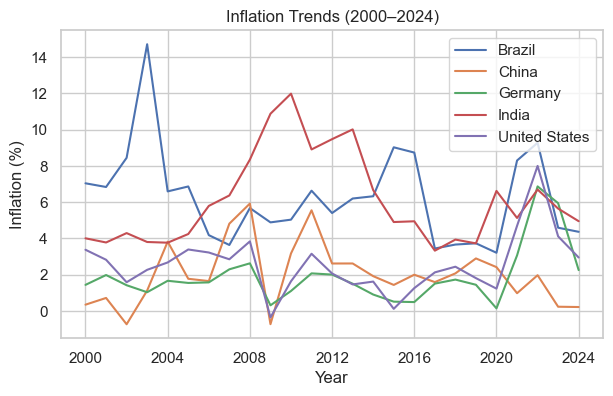

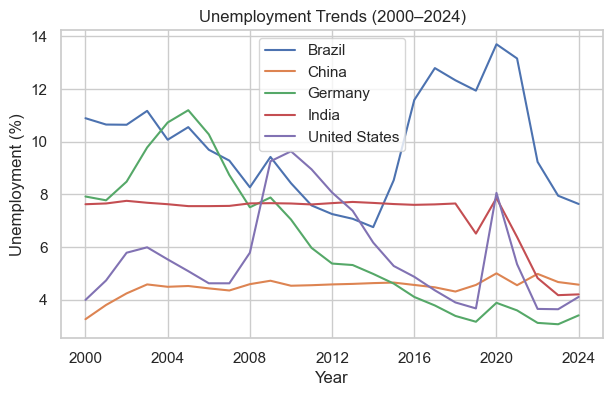

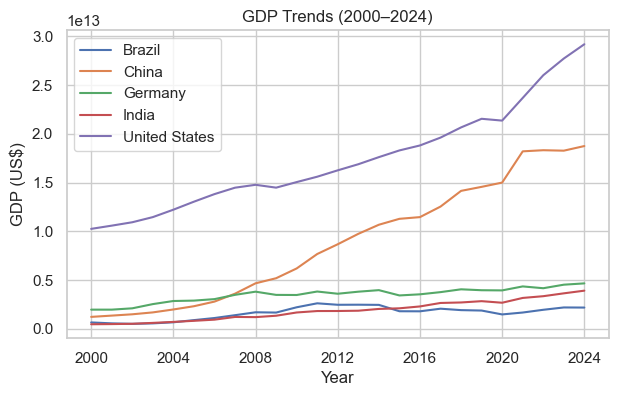

Correlation matrix:
                   Inflation (%)  Unemployment (%)  GDP (current US$)
Inflation (%)            1.00000          0.369760          -0.336660
Unemployment (%)         0.36976          1.000000          -0.420044
GDP (current US$)       -0.33666         -0.420044           1.000000


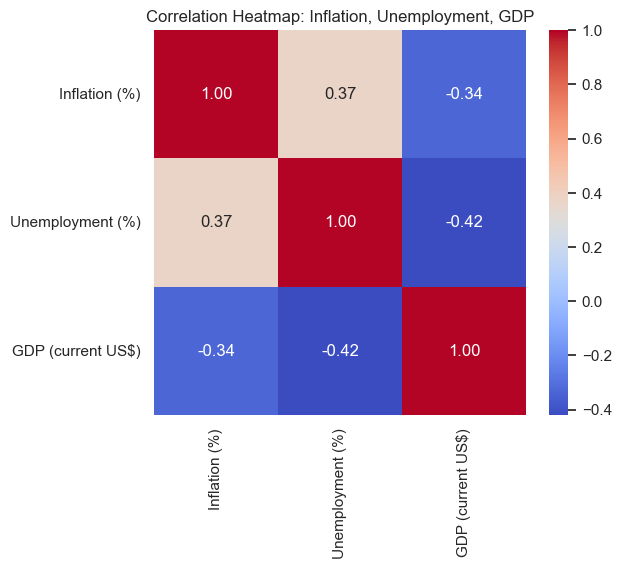

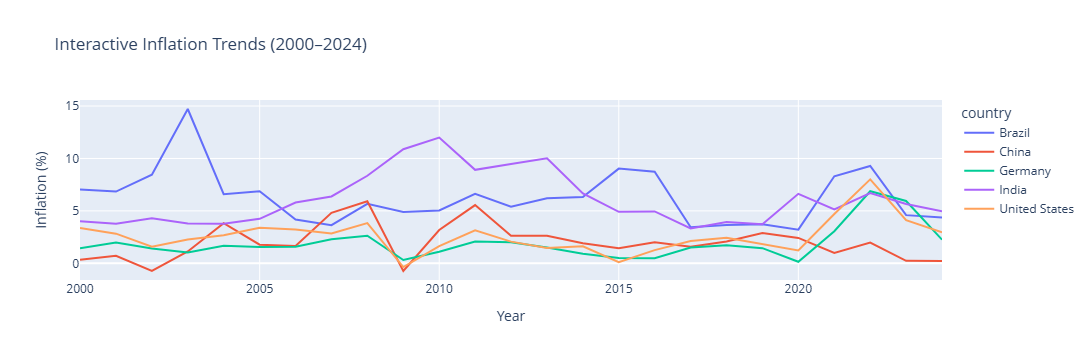

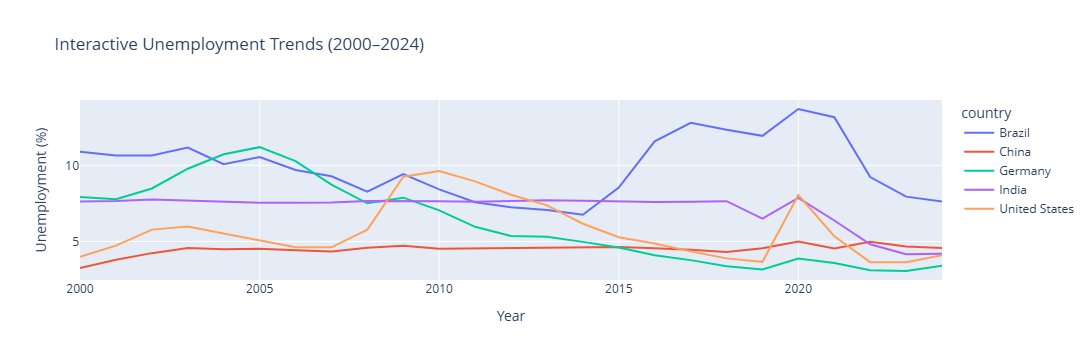

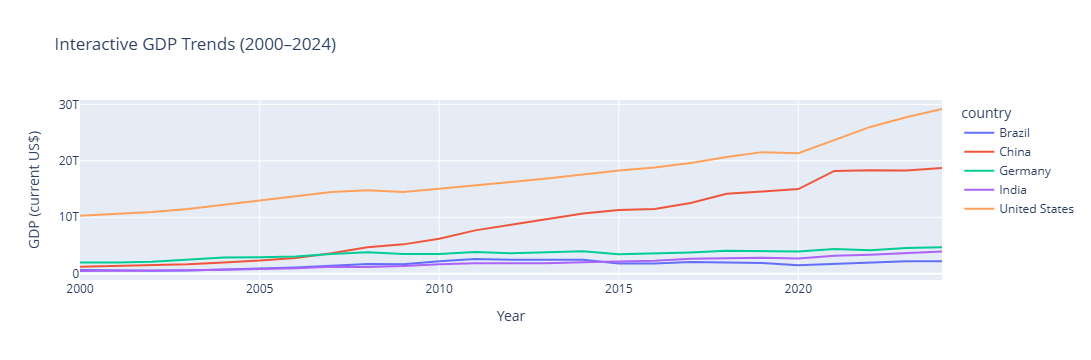

Cleaned data saved to 'macro_data_portfolio.csv'
Correlation matrix saved to 'macro_correlation_matrix.csv'


In [4]:
# --- Imports ---
import wbdata
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# --- Settings ---
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

countries = ["US", "DE", "IN", "CN", "BR"]  # USA, Germany, India, China, Brazil

# --- Indicators ---
indicators = {
    "FP.CPI.TOTL.ZG": "Inflation (%)",      # Inflation, consumer prices
    "SL.UEM.TOTL.ZS": "Unemployment (%)",   # Unemployment
    "NY.GDP.MKTP.CD": "GDP (current US$)"   # GDP
}

# --- Time range ---
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

# -----------------------------
# Fetch data from World Bank
# -----------------------------
print("Downloading data from World Bank...")
data = wbdata.get_dataframe(indicators, country=countries, date=(start_date, end_date))

# --- Clean and sort ---
data = data.reset_index(drop=False)               # Move country/date from index to columns
data = data.rename(columns={'date': 'Year'})      # Rename column
data = data.sort_values(["country", "Year"])      # Sort rows
data = data.reset_index(drop=True)                # Reset row numbers
data["Year"] = pd.to_datetime(data["Year"], format="%Y")  # Convert Year to datetime

print("Data sample:")
print(data.head())

# -----------------------------
# Static Visualization
# ----------------------------

# Check available countries in the data
available_countries = data['country'].unique()
print("Available countries:", available_countries)

# --- Inflation Plot ---
plt.figure(figsize=(7,4))
for c in available_countries:  # automatically loops over all available countries
    subset = data[data['country'] == c]
    if not subset.empty:       # only plot if subset has data
        plt.plot(subset['Year'], subset['Inflation (%)'], label=c)
plt.title("Inflation Trends (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.legend()
plt.show()

# --- Unemployment Plot ---
plt.figure(figsize=(7,4))
for c in available_countries:
    subset = data[data['country'] == c]
    if not subset.empty:
        plt.plot(subset['Year'], subset['Unemployment (%)'], label=c)
plt.title("Unemployment Trends (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Unemployment (%)")
plt.legend()
plt.show()

# --- GDP Plot ---
plt.figure(figsize=(7,4))
for c in available_countries:
    subset = data[data['country'] == c]
    if not subset.empty:
        plt.plot(subset['Year'], subset['GDP (current US$)'], label=c)
plt.title("GDP Trends (2000–2024)")
plt.xlabel("Year")
plt.ylabel("GDP (US$)")
plt.legend()
plt.show()

# -----------------------------
# Correlation Analysis
# -----------------------------
corr_data = data[["Inflation (%)", "Unemployment (%)", "GDP (current US$)"]]
corr_matrix = corr_data.corr()
print("Correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Inflation, Unemployment, GDP")
plt.show()

# -----------------------------
# Interactive Plots with Plotly
# -----------------------------
fig = px.line(data, x="Year", y="Inflation (%)", color="country", title="Interactive Inflation Trends (2000–2024)")
fig.show()

fig = px.line(data, x="Year", y="Unemployment (%)", color="country", title="Interactive Unemployment Trends (2000–2024)")
fig.show()

fig = px.line(data, x="Year", y="GDP (current US$)", color="country", title="Interactive GDP Trends (2000–2024)")
fig.show()

# -----------------------------
# Save cleaned data and correlation matrix
# -----------------------------
data.to_csv("macro_data_portfolio.csv", index=False)
corr_matrix.to_csv("macro_correlation_matrix.csv")
print("Cleaned data saved to 'macro_data_portfolio.csv'")
print("Correlation matrix saved to 'macro_correlation_matrix.csv'")
